### Task 1 
1.Exploratory Data Analysis on Training Data set

2.Show some graphical representations for EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("D:\\DS Machine Learning\\Machine_Learning-main\\Assignments\\Assignment1\\train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


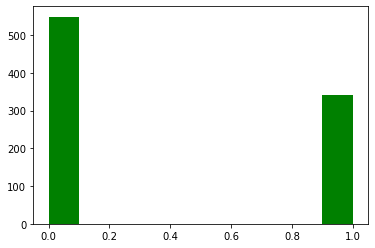

In [10]:
plt.hist(train['Survived'],bins=10,color='g')
plt.show()

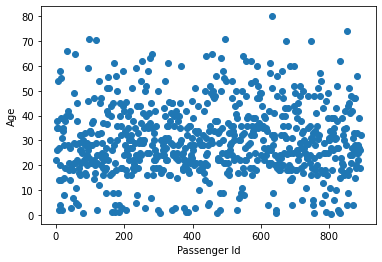

In [11]:
plt.scatter(train["PassengerId"],train["Age"])
plt.xlabel('Passenger Id')
plt.ylabel('Age')
plt.show()

### Task 2 	
1.Perform regression and fit model to predict the values for the data in test data set.

2.Generate csv file containing only ‘Gender’ and predicted outcome.


In [12]:
testdata = pd.read_csv("D:\\DS Machine Learning\\Machine_Learning-main\\Assignments\\Assignment1\\test.csv") 

In [13]:
testdata.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [14]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
testdata.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
testdata['Age']=testdata['Age'].fillna(0)

In [30]:
testdata['Fare']=testdata['Fare'].fillna(0)

In [31]:
testdata['Cabin']=testdata['Cabin'].fillna(0)

In [32]:
testdata.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [33]:
testdata.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [34]:
testdata.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [35]:
test_data=pd.get_dummies(testdata,drop_first=True)

In [38]:
test_data.corr()

,Pclass,Age,SibSp,Parch,Sex_male
Pclass,1.000000,-0.513223,0.001087,0.018721,0.108615
Age,-0.513223,1.000000,-0.004321,-0.025037,-0.053715
SibSp,0.001087,-0.004321,1.000000,0.306895,-0.099943
Parch,0.018721,-0.025037,0.306895,1.000000,-0.159120
Sex_male,0.108615,-0.053715,-0.099943,-0.159120,1.000000


In [49]:
x=test_data.drop('Parch',axis=1)
y=test_data['Parch']


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [51]:
model=LogisticRegression()

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [53]:
model.fit(x_train,y_train)


C:\Users\MUSTAFA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
model.score(x_train,y_train)

0.7842465753424658

In [55]:
model.score(x_test,y_test)

0.7698412698412699

In [56]:
y_pred = model.predict(x_test)

In [57]:
accuracy_score(y_test,y_pred)

0.7698412698412699

In [60]:
Cm = confusion_matrix(y_test,y_pred)

In [62]:
Cm

array([[95,  1,  1,  0,  0,  0],
       [16,  1,  1,  0,  0,  0],
       [ 6,  1,  1,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]], dtype=int64)

In [73]:
csv = pd.DataFrame()

In [74]:
csv['Gender'] = train['Sex']
csv['Survived'] =train['Survived']

In [76]:
csv.to_csv("Survival_pred.csv")